# Part 3: Critical Thinking

## Ethics & Bias

**How Biased Training Data Affects Patient Outcomes:**
- **Underestimation of minority patient risk:** Historical data may show lower documented readmission rates for minority populations, causing the model to under-predict risk and deny preventive interventions.
- **Socioeconomic disparities:** Patients from low-income neighborhoods may have fewer documented comorbidities, leading to missed risk factors, while affluent patients get more accurate predictions.
- **Self-fulfilling prophecy:** Models trained on biased historical discharge practices can continue to allocate fewer resources to certain groups.
- **Differential measurement:** Incomplete EHR data for some populations reduces model accuracy, creating a vicious cycle.

**Real-world consequences:**
- Higher actual readmission rates for underserved populations
- Widening health disparities despite technological advancement
- Potential legal liability for discriminatory healthcare delivery
- Erosion of trust in AI-assisted healthcare among vulnerable communities

**Strategy to Mitigate Bias:**
- **Fairness-Aware Model Training with Demographic Parity Constraints**
  - Measure fairness metrics across demographic groups (recall, precision, false negative rates)
  - Set thresholds: no group should have >5% lower recall than the overall population
  - Apply fairness constraints during training:
    - Adversarial debiasing: train model while training a discriminator to predict demographics
    - Add fairness penalty term to loss function
    - Post-processing calibration to adjust thresholds per group
  - Supplement data collection for underserved populations
  - Partner with community health centers to capture social determinants of health
  - Include diverse stakeholders and ethics review board
  - Regular audits and clinician feedback mechanisms
  - Transparent reporting of disaggregated performance metrics

---

## Trade-offs

**Model Interpretability vs. Accuracy in Healthcare:**
- **Interpretable models (Logistic Regression, Decision Trees):**
  - Clear explanations of risk factors per patient
  - Enable clinical validation and trust
  - Facilitate regulatory approval and legal defensibility
  - Allow physicians to combine AI insights with clinical judgment
- **Complex models (Deep Neural Networks, Gradient Boosting):**
  - Slightly higher predictive accuracy
  - Capture subtle interaction effects
  - Operate as “black boxes,” difficult to interpret
  - May cause clinician skepticism and reduce adoption

**Why Interpretability is Critical:**
- Clinical safety: understanding flagged risks vs. physician assessment
- Patient communication: explain interventions for shared decision-making
- Legal accountability: defend decisions using interpretable predictions
- Continuous improvement: clinicians can refine model predictions based on feedback

**Recommendation:**  
Prioritize interpretable models. Example: Logistic regression or simple decision trees with slightly lower accuracy but high clinician trust and adoption.

---

**Impact of Limited Computational Resources:**
- Constraints:
  - Cannot deploy resource-intensive models (DNNs need GPUs)
  - Limited storage for large ensemble models
  - Need fast inference for real-time predictions
- Optimal Approach:
  - Use simpler models: Logistic regression or shallow decision trees
  - Feature reduction: select top 20-30 predictive features
  - Batch processing: pre-compute risk scores for next-day discharges
  - Rule-based augmentation: handle obvious high-risk cases with simple rules
  - Optional lightweight cloud deployment (e.g., AWS Lambda) for serverless predictions
- Outcome: Simple, fast, interpretable models deliver ~80% of value with 20% complexity, ensuring practical, maintainable solutions.


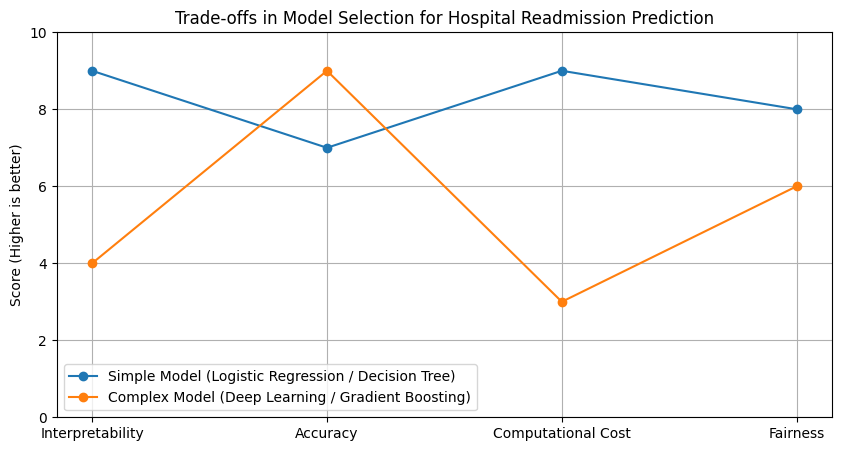

In [1]:
import matplotlib.pyplot as plt

# Data for visualization
categories = ['Interpretability', 'Accuracy', 'Computational Cost', 'Fairness']
simple_model = [9, 7, 9, 8]  # Example scores for Logistic Regression / Decision Tree
complex_model = [4, 9, 3, 6]  # Example scores for Deep Learning / Gradient Boosting

x = range(len(categories))

plt.figure(figsize=(10,5))
plt.plot(x, simple_model, marker='o', label='Simple Model (Logistic Regression / Decision Tree)')
plt.plot(x, complex_model, marker='o', label='Complex Model (Deep Learning / Gradient Boosting)')
plt.xticks(x, categories)
plt.ylim(0,10)
plt.ylabel('Score (Higher is better)')
plt.title('Trade-offs in Model Selection for Hospital Readmission Prediction')
plt.grid(True)
plt.legend()
plt.show()
